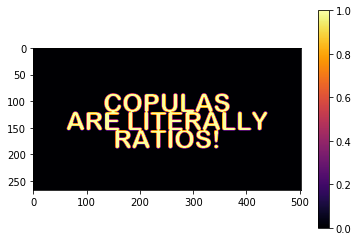

In [269]:
import os
import numpy as np
import scipy.stats as scs
import pickle
import joblib
import time
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from Ratio import *
from Ratio_L_and_W import *

start = time.time()

import matplotlib.image as mpimg

img=mpimg.imread('../copula_equals_ratio.png')#'emily1.jpg')#
# convert to grayscale
img = np.mean(img, axis=2)
img = np.log(1e-2 +img / 6.0)
# rescale to 0,1
img = (img - np.min(img)) / (np.max(img) - np.min(img))
img = np.abs(img - 1.0) 
#img = img[:400,:450]
plt.imshow(img, cmap='inferno')
plt.colorbar()

np.random.seed(990109)
torch.manual_seed(990109)

N_TRAIN = 5000
N_TEST = 5000

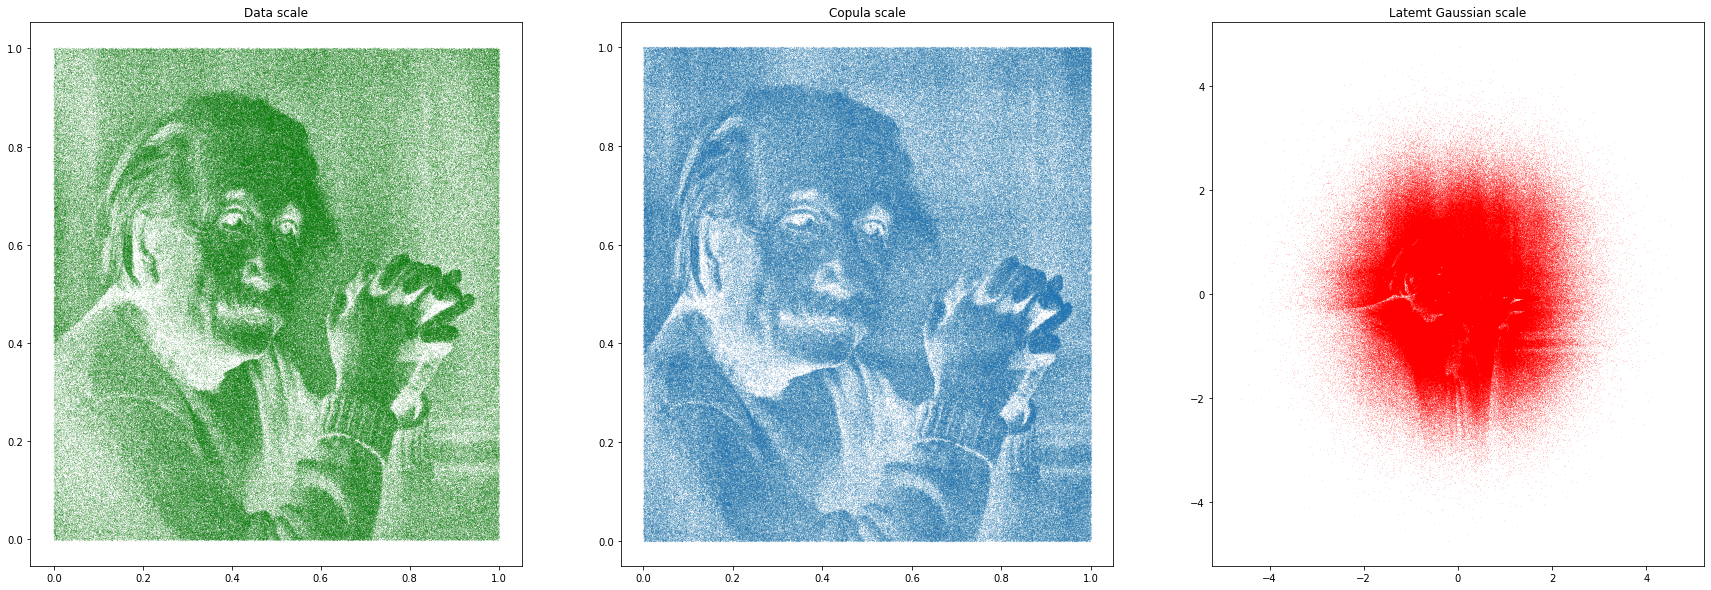

In [251]:
img_probs = img/ np.sum(img)
sample_idx = np.random.choice(np.arange(img_probs.flatten().shape[0]), size=1000000,  p=img_probs.flatten())
x = np.linspace(0, 1, img.shape[1])
y = np.linspace(1, 0, img.shape[0])
X, Y = np.meshgrid(x, y)
X = X.flatten()
Y = Y.flatten()
X = X[sample_idx]
Y = Y[sample_idx]
data_p = np.stack([X, Y], axis=1) + np.random.normal(0, 0.001, (X.shape[0], 2))

from statsmodels.distributions.empirical_distribution import ECDF

cdf_1 = ECDF(data_p[:,0])
cdf_2 = ECDF(data_p[:,1])

from scipy.interpolate import interp1d
import scipy 

slope_changes = sorted(set(data_p[:,0]))

sample_edf_values_at_slope_changes1 = [ cdf_1(item) for item in slope_changes]
sample_edf_values_at_slope_changes2 = [ cdf_2(item) for item in slope_changes]

# Extend the range of the input values by 0.1
extended_sample_edf_values1 = np.concatenate(([sample_edf_values_at_slope_changes1[0] - 0.01], sample_edf_values_at_slope_changes1, [sample_edf_values_at_slope_changes1[-1] + 0.1]))
extended_sample_edf_values2 = np.concatenate(([sample_edf_values_at_slope_changes2[0] - 0.01], sample_edf_values_at_slope_changes2, [sample_edf_values_at_slope_changes2[-1] + 0.1]))
extended_slope_changes = np.concatenate(([slope_changes[0] - 0.1], slope_changes, [slope_changes[-1] + 0.1]))

# Create the interpolating functions with extrapolation
inverted_cdf1 = interp1d(extended_sample_edf_values1, extended_slope_changes, bounds_error=False, fill_value="extrapolate")
inverted_cdf2 = interp1d(extended_sample_edf_values2, extended_slope_changes, bounds_error=False, fill_value="extrapolate")

u = cdf_1(data_p[:,0])
v = cdf_2(data_p[:,1])

z1 = scipy.stats.norm.ppf(u)
z2 = scipy.stats.norm.ppf(v)
z = np.stack([z1, z2], axis=1)
z = np.nan_to_num(z, nan=0, posinf=0, neginf=0)

# do a 3 subplot
fig, ax = plt.subplots(1,3, figsize=(30,10))
ax[0].scatter(data_p[:,0],data_p[:,1],s=0.002,c='green')
ax[1].scatter(u,v, s=0.003)
ax[2].scatter(z1,z2, s=0.002, c='red')
# titles for each
ax[0].set_title('Data scale')
ax[1].set_title('Copula scale')
ax[2].set_title('Latemt Gaussian scale')

plt.show()

# results

In [145]:
einstein_samples = z
ratio_einstein = (gauss * ratio_grid).reshape(1000, 1000)
TLL_einstein = density

In [259]:
igc_einstein = all_samples


In [241]:
cop_is_ratio_samples = z
ratio_cop_is_ratio = (gauss * ratio_grid).reshape(1000, 1000)
TLL_cop_is_ratio = density

In [242]:
igc_cop_is_ratio = all_samples


C:\Users\david\AppData\Local\Temp\ipykernel_30652\3074337093.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('inferno_r')
C:\Users\david\AppData\Local\Temp\ipykernel_30652\3074337093.py:28: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax[0, 2].scatter((igc_einstein[:, 0]), (igc_einstein[:, 1]), s=0.003, c=cmap(0.6),alpha=0.8)
C:\Users\david\AppData\Local\Temp\ipykernel_30652\3074337093.py:53: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping

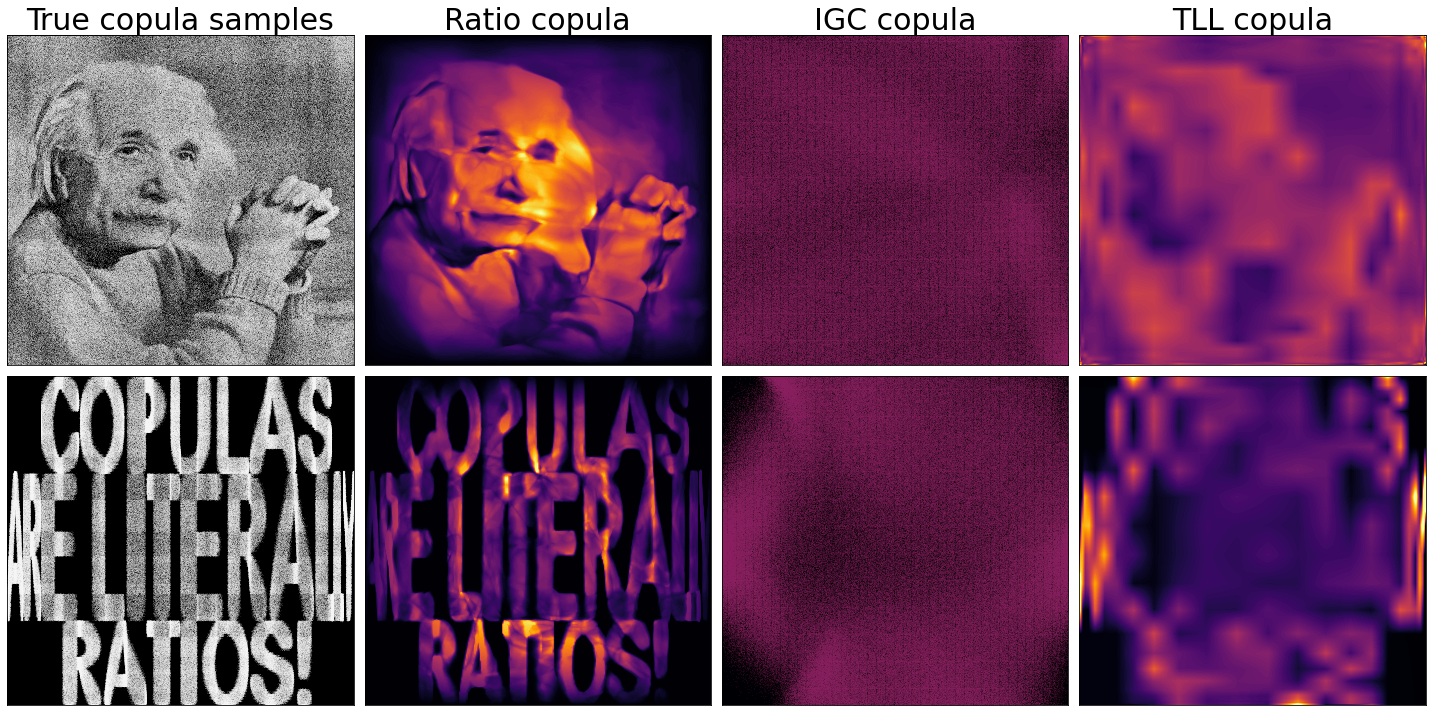

In [264]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as scs

cmap = cm.get_cmap('inferno_r')

# Create the figure and subplots
fig, ax = plt.subplots(2, 4, figsize=(20, 10))

# Top row
# 0,0: 2D samples called einstein_samples
ax[0, 0].set_facecolor('black')
ax[0, 0].scatter(scs.norm.cdf(einstein_samples[:, 0]), scs.norm.cdf(einstein_samples[:, 1]), s=0.001, c='white')
ax[0, 0].set_xlim(0, 1)
ax[0, 0].set_ylim(0, 1)
ax[0, 0].set_title('True copula samples',fontsize=30)

# 0,1: ratio_einstein values as a 1000x1000 meshgrid
meshgrid_x, meshgrid_y = np.meshgrid(np.linspace(-1, 1, 1000), np.linspace(-1, 1, 1000))
meshgrid_x = scs.norm.cdf(meshgrid_x)
meshgrid_y = scs.norm.cdf(meshgrid_y)
meshgrid = np.meshgrid(np.linspace(-xy_, xy_, 1000), np.linspace(-xy_, xy_, 1000))
ax[0, 1].contourf(scs.norm.cdf(meshgrid[0]), scs.norm.cdf(meshgrid[1]), (ratio_einstein).reshape(1000, 1000),levels=100,cmap='inferno')
ax[0, 1].set_title('Ratio copula',fontsize=30)

# 0,2: 2D samples called igc_einstein
ax[0, 2].set_facecolor(background_color)
ax[0, 2].scatter((igc_einstein[:, 0]), (igc_einstein[:, 1]), s=0.003, c=cmap(0.6),alpha=0.8)
ax[0, 2].set_xlim(0, 1)
ax[0, 2].set_ylim(0, 1)
ax[0, 2].set_title('IGC copula',fontsize=30)

# 0,3: 1000x1000 meshgrid called TLL_einstein
ax[0, 3].contourf((meshgrid[0]), (meshgrid[1]), np.clip(TLL_einstein,a_min=0,a_max=3).reshape(1000, 1000),levels=100,cmap='inferno')
ax[0, 3].set_title('TLL copula',fontsize=30)

# Bottom row
# 1,0: 2D samples called cop_is_ratio_samples
ax[1, 0].set_facecolor('black')
ax[1, 0].scatter(scs.norm.cdf(cop_is_ratio_samples[:, 0]), scs.norm.cdf(cop_is_ratio_samples[:, 1]), s=0.001, c='white')
ax[1, 0].set_xlim(0, 1)
ax[1, 0].set_ylim(0, 1)

# 1,1: ratio_cop_is_ratio values as a 1000x1000 meshgrid
meshgrid_x, meshgrid_y = np.meshgrid(np.linspace(-1, 1, 1000), np.linspace(-1, 1, 1000))
meshgrid_x = scs.norm.cdf(meshgrid_x)
meshgrid_y = scs.norm.cdf(meshgrid_y)
meshgrid = np.meshgrid(np.linspace(-xy_, xy_, 1000), np.linspace(-xy_, xy_, 1000))
ax[1, 1].contourf(scs.norm.cdf(meshgrid[0]), scs.norm.cdf(meshgrid[1]), (ratio_cop_is_ratio).reshape(1000, 1000),levels=100,cmap='inferno')

# 1,2: 2D samples called igc_cop_is_ratio
ax[1, 2].set_facecolor(background_color)
ax[1, 2].scatter((igc_cop_is_ratio[:, 0]), (igc_cop_is_ratio[:, 1]), s=0.003,  c=cmap(0.6),alpha=0.8)
ax[1, 2].set_xlim(0, 1)
ax[1, 2].set_ylim(0, 1)

# 1,3: 1000x1000 meshgrid called TLL_cop_is_ratio
ax[1, 3].contourf((meshgrid[0]), (meshgrid[1]), np.clip(TLL_cop_is_ratio,a_min=0,a_max=5).reshape(1000, 1000),levels=100,cmap='inferno')

for j in range(2):
    for i in range(4):
        ax[j, i].set_xticks([])
        ax[j, i].set_yticks([])


# Adjust layout
plt.tight_layout()
plt.savefig('comparison_2d_images.png', dpi=300)
plt.show()

#  Vine

In [218]:
import pyvinecopulib as pv
import time 

In [219]:
lim = z.shape[0]

U = scs.norm.cdf(z[:lim].reshape(-1,2))


In [220]:
n= U.shape[0]
d=2
scott_bdw = (n * (d + 2) / 4.)**(-1. / (d + 4))
scott_bdw

0.10000000000000002

In [111]:

# vine 10s on 2d with 100K

start = time.time()
controls = pv.FitControlsVinecop(family_set=[pv.BicopFamily.tll],
                                                selection_criterion='mbic',
                                                nonparametric_method='constant', #KDE-copula
                                                nonparametric_mult=scott_bdw,
                                                # truntrunc_lvl=5,threshold=0.05 30K mnist -> 33mins train/sample/evals
                                                # threshold=0.05, # trunc_lvl=10,threshold=0.05 30K mnist -> 42mins train/sample/evals
                                                # threshold=0.05, # trunc_lvl=50,threshold=0.05 30K mnist -> 2h10 train/sample/evals
                                                num_threads = 8) # bandwidth
cop_cst = pv.Vinecop(U, controls=controls)
print('fitted',time.time()-start)


fitted 125.76649475097656


In [221]:
start = time.time()
controls = pv.FitControlsVinecop(family_set=[pv.BicopFamily.tll],
                                                selection_criterion='mbic',
                                                nonparametric_method='linear', #KDE-copula
                                                nonparametric_mult=scott_bdw,
                                                # truntrunc_lvl=5,threshold=0.05 30K mnist -> 33mins train/sample/evals
                                                # threshold=0.05, # trunc_lvl=10,threshold=0.05 30K mnist -> 42mins train/sample/evals
                                                # threshold=0.05, # trunc_lvl=50,threshold=0.05 30K mnist -> 2h10 train/sample/evals
                                                num_threads = 8) # bandwidth
cop_lin = pv.Vinecop(U, controls=controls)
print('fitted',time.time()-start)

KeyboardInterrupt: 

In [222]:
start = time.time()
controls = pv.FitControlsVinecop(family_set=[pv.BicopFamily.tll],
                                                selection_criterion='mbic',
                                                nonparametric_method='quadratic', #KDE-copula
                                                nonparametric_mult=scott_bdw,
                                                # truntrunc_lvl=5,threshold=0.05 30K mnist -> 33mins train/sample/evals
                                                # threshold=0.05, # trunc_lvl=10,threshold=0.05 30K mnist -> 42mins train/sample/evals
                                                # threshold=0.05, # trunc_lvl=50,threshold=0.05 30K mnist -> 2h10 train/sample/evals
                                                num_threads = 8) # bandwidth
cop_quad = pv.Vinecop(U, controls=controls)
print('quadratic',time.time()-start)

quadratic 198.20111465454102


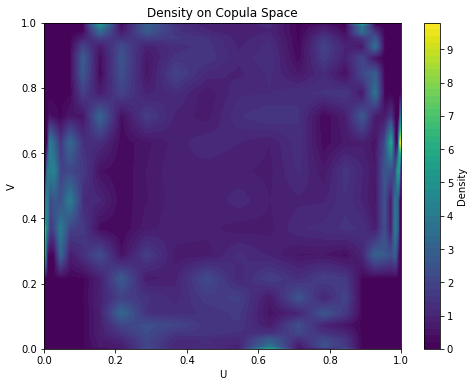

In [223]:
# Generate a grid of points in the copula space
grid_size = 1000
u = np.linspace(0, 1, grid_size)
v = np.linspace(0, 1, grid_size)
U_grid, V_grid = np.meshgrid(u, v)
grid_points = np.column_stack([U_grid.flatten(), V_grid.flatten()])

# Evaluate the density on the grid
density = cop_quad.pdf(grid_points).reshape(grid_size, grid_size)
gauss_density = scs.multivariate_normal.pdf(grid_points, mean=[0, 0], cov=[[1, 0], [0, 1]]).reshape(grid_size, grid_size)
density = (density + gauss_density)
# Plot the density
plt.figure(figsize=(8, 6))
plt.contourf(U_grid, V_grid, density, levels=50, cmap='viridis')
plt.colorbar(label='Density')
plt.xlabel('U')
plt.ylabel('V')
plt.title('Density on Copula Space')
plt.show()

# IGC

In [252]:

    #### IGC model



    class SoftRank(nn.Module):
        """Differentiable ranking layer"""
        def __init__(self, alpha=1000.0):
            super(SoftRank, self).__init__()
            self.alpha = alpha # constant for scaling the sigmoid to approximate sign function, larger values ensure better ranking, overflow is handled properly by PyTorch

        def forward(self, inputs):
            # input is a ?xSxD tensor, we wish to rank the S samples in each dimension per each batch
            # output is  ?xSxD tensor where for each dimension the entries are (rank-0.5)/N_rank
            x = inputs.unsqueeze(-1) #(?,S,D) -> (?,S,D,1)
            x_2 = x.repeat(1, 1, 1, x.shape[1]) # (?,S,D,1) -> (?,S,D,S) (samples are repeated along axis 3, i.e. the last axis)
            x_1 = x_2.transpose(1, 3) #  (?,S,D,S) -> (?,S,D,S) (samples are repeated along axis 1)
            return torch.transpose(torch.sum(torch.sigmoid(self.alpha*(x_1-x_2)), dim=1), 1, 2)/(torch.tensor(x.shape[1], dtype=torch.float32))


    class IGC(nn.Module):
        
        def __init__(self, hidden_size=100, layers_number=2, output_size=2):
            super(IGC, self).__init__()
            self.dim_latent = 3 * output_size
            self.hidden_size = hidden_size
            self.layers_nuber = layers_number
            self.output_size = output_size
            self.linear_in = nn.Linear(in_features=self.dim_latent, out_features=self.hidden_size) 
            self.linear = nn.Linear(in_features=self.hidden_size, out_features=self.hidden_size)
            self.linear_out = nn.Linear(in_features=self.hidden_size, out_features=self.output_size)
            self.marginal_cdfs = None
            self.ecdf_10e6_samples = None

        def forward_train(self, z):
            '''
            Input noise z with shape (M,dim_latent)\\
            Outputs (u,v) pairs with shape (M,output_size=2), while ensuring u and v each have uniform marginals.
            '''
            y = torch.relu(self.linear_in(z))
            for layer in range(self.layers_nuber):
                y = torch.relu(self.linear(y))
            y = self.linear_out(y).unsqueeze(0)
            u = SoftRank()(y).squeeze(0)
            return u
            
        def Energy_Score_pytorch(self,beta, observations_y, simulations_Y):
            n = len(observations_y)
            m = len(simulations_Y)

            # First part |Y-y|. Gives the L2 dist scaled by power beta. Is a vector of length n/one value per location.
            diff_Y_y = torch.pow(
                torch.norm(
                    (observations_y.unsqueeze(1) -
                    simulations_Y.unsqueeze(0)).float(),
                    dim=2,keepdim=True).reshape(-1,1),
                beta)

            # Second part |Y-Y'|. 2* because pdist counts only once.
            diff_Y_Y = 2 * torch.pow(
                nn.functional.pdist(simulations_Y),
                beta)
            Energy = 2 * torch.mean(diff_Y_y) - torch.sum(diff_Y_Y) / (m * (m - 1))
            return Energy


        def forward(self, n_samples):
            ''' 
            Function to sample from the copula, once training is done.

            Input: n_samples - number of samples to generate
            Output: torch.tensor of shape (n_samples, output_size) on copula space.
            '''
            with torch.no_grad():
                if self.marginal_cdfs is None:
                    self.marginal_cdfs = []
                    # sample 10^6 points from the latent space and compute empirical marginal cdfs
                    z = torch.randn(10**6, self.dim_latent)
                    y = torch.relu(self.linear_in(z))
                    for layer in range(self.layers_nuber):
                        y = torch.relu(self.linear(y))
                    y = self.linear_out(y) # samples used to approximate cdfs
                    for dim in range(y.shape[1]):
                        ecdf = ECDF(y[:, dim].numpy())
                        self.marginal_cdfs.append(ecdf)
                    self.ecdf_10e6_samples = y
                # sample the latent space and apply ecdfs
                z = torch.randn(n_samples, self.dim_latent)
                y = torch.relu(self.linear_in(z))
                for layer in range(self.layers_nuber):
                    y = torch.relu(self.linear(y))
                y = self.linear_out(y)
                for dim in range(y.shape[1]):
                    y[:, dim] = torch.tensor(self.marginal_cdfs[dim](y[:, dim].numpy()), dtype=torch.float32)
                return y



In [268]:
np.linspace(1,20,10)

array([ 1.        ,  3.11111111,  5.22222222,  7.33333333,  9.44444444,
       11.55555556, 13.66666667, 15.77777778, 17.88888889, 20.        ])

In [266]:
from tqdm import tqdm
# Calculate the number of parameters
igc_cop = IGC(hidden_size=100, layers_number=2, output_size=2)
total_params = sum(p.numel() for p in igc_cop.parameters())
print(f'Total parameters: {total_params}')

Total parameters: 11002


In [254]:

# make training data on 0-1 scale
#X_train_cop = torch.tensor(scs.norm.cdf(X_train.reshape(-1,28*28)),dtype=torch.float32).clip(1e-5,1-1e-5)

# training loop

u_obs = torch.tensor(scs.norm.cdf(z[:lim].reshape(-1,2)))

optimizer = torch.optim.Adam(igc_cop.parameters())
loss_hist = []

for i in tqdm(range(100000)):
    optimizer.zero_grad()
    u = igc_cop.forward_train(torch.randn((200, igc_cop.dim_latent)))
    loss = igc_cop.Energy_Score_pytorch(1, u_obs[np.random.choice(range(u_obs.shape[0]),100,replace=True)], u)
    loss.backward()
    optimizer.step()
    loss_hist.append(loss.item())
    if i % 50 == 0:
        print(loss.item())


  0%|          | 2/100000 [00:00<2:21:25, 11.78it/s]

0.4890953302383423


  0%|          | 51/100000 [00:05<2:48:31,  9.88it/s]

0.5066698789596558


  0%|          | 102/100000 [00:10<2:44:39, 10.11it/s]

0.489030659198761


  0%|          | 151/100000 [00:15<2:47:05,  9.96it/s]

0.5390613079071045


  0%|          | 202/100000 [00:20<2:55:50,  9.46it/s]

0.5171485543251038


  0%|          | 252/100000 [00:25<2:47:08,  9.95it/s]

0.5362602472305298


  0%|          | 302/100000 [00:31<2:57:30,  9.36it/s]

0.5254335403442383


  0%|          | 352/100000 [00:36<3:00:06,  9.22it/s]

0.5092346668243408


  0%|          | 402/100000 [00:41<2:55:06,  9.48it/s]

0.49751198291778564


  0%|          | 453/100000 [00:47<2:53:29,  9.56it/s]

0.5374026298522949


  1%|          | 502/100000 [00:52<3:07:49,  8.83it/s]

0.5331460237503052


  1%|          | 552/100000 [00:58<2:53:54,  9.53it/s]

0.5093228220939636


  1%|          | 601/100000 [01:03<2:59:44,  9.22it/s]

0.5387812852859497


  1%|          | 652/100000 [01:08<2:51:46,  9.64it/s]

0.5370136499404907


  1%|          | 702/100000 [01:14<3:00:37,  9.16it/s]

0.5261009335517883


  1%|          | 752/100000 [01:19<2:55:47,  9.41it/s]

0.5557258129119873


  1%|          | 802/100000 [01:24<2:59:14,  9.22it/s]

0.5004202127456665


  1%|          | 851/100000 [01:30<2:58:33,  9.25it/s]

0.5094177722930908


  1%|          | 901/100000 [01:35<3:01:17,  9.11it/s]

0.523844838142395


  1%|          | 952/100000 [01:41<2:58:11,  9.26it/s]

0.5125608444213867


  1%|          | 1002/100000 [01:46<2:53:52,  9.49it/s]

0.5335595011711121


  1%|          | 1052/100000 [01:51<2:56:53,  9.32it/s]

0.5472390651702881


  1%|          | 1102/100000 [01:57<3:03:52,  8.96it/s]

0.5384407043457031


  1%|          | 1152/100000 [02:02<2:56:42,  9.32it/s]

0.5207892656326294


  1%|          | 1202/100000 [02:08<2:53:06,  9.51it/s]

0.5278164744377136


  1%|▏         | 1252/100000 [02:13<2:58:56,  9.20it/s]

0.49281173944473267


  1%|▏         | 1302/100000 [02:19<2:57:08,  9.29it/s]

0.523792028427124


  1%|▏         | 1353/100000 [02:24<2:52:12,  9.55it/s]

0.5238756537437439


  1%|▏         | 1402/100000 [02:29<3:01:11,  9.07it/s]

0.5200192928314209


  1%|▏         | 1452/100000 [02:35<2:58:13,  9.22it/s]

0.5040645003318787


  2%|▏         | 1502/100000 [02:40<2:57:44,  9.24it/s]

0.5227187871932983


  2%|▏         | 1552/100000 [02:46<2:53:07,  9.48it/s]

0.4940415024757385


  2%|▏         | 1601/100000 [02:51<2:58:36,  9.18it/s]

0.5241003632545471


  2%|▏         | 1652/100000 [02:56<2:55:02,  9.36it/s]

0.5118131637573242


  2%|▏         | 1702/100000 [03:02<3:00:09,  9.09it/s]

0.5066367983818054


  2%|▏         | 1751/100000 [03:07<2:55:24,  9.34it/s]

0.5246901512145996


  2%|▏         | 1802/100000 [03:13<2:55:54,  9.30it/s]

0.5340756773948669


  2%|▏         | 1852/100000 [03:18<2:56:06,  9.29it/s]

0.49355077743530273


  2%|▏         | 1902/100000 [03:24<2:56:21,  9.27it/s]

0.5159050226211548


  2%|▏         | 1952/100000 [03:29<2:50:18,  9.59it/s]

0.5172485113143921


  2%|▏         | 2002/100000 [03:34<2:57:01,  9.23it/s]

0.48475778102874756


  2%|▏         | 2052/100000 [03:40<2:55:11,  9.32it/s]

0.49368709325790405


  2%|▏         | 2102/100000 [03:45<2:55:31,  9.30it/s]

0.5116348266601562


  2%|▏         | 2151/100000 [03:51<2:56:55,  9.22it/s]

0.5215433239936829


  2%|▏         | 2202/100000 [03:56<2:55:12,  9.30it/s]

0.5061829686164856


  2%|▏         | 2253/100000 [04:02<2:50:09,  9.57it/s]

0.5173054337501526


  2%|▏         | 2302/100000 [04:07<3:01:56,  8.95it/s]

0.5300264358520508


  2%|▏         | 2352/100000 [04:13<2:51:42,  9.48it/s]

0.5289243459701538


  2%|▏         | 2401/100000 [04:18<2:55:10,  9.29it/s]

0.5246003866195679


  2%|▏         | 2452/100000 [04:24<2:58:15,  9.12it/s]

0.534004271030426


  3%|▎         | 2501/100000 [04:29<2:56:27,  9.21it/s]

0.4956868290901184


  3%|▎         | 2552/100000 [04:35<2:52:05,  9.44it/s]

0.5179653167724609


  3%|▎         | 2601/100000 [04:40<3:03:51,  8.83it/s]

0.5298098921775818


  3%|▎         | 2653/100000 [04:46<2:50:49,  9.50it/s]

0.5232733488082886


  3%|▎         | 2701/100000 [04:51<3:13:46,  8.37it/s]

0.5169501304626465


  3%|▎         | 2752/100000 [04:57<2:52:53,  9.37it/s]

0.5388336777687073


  3%|▎         | 2802/100000 [05:02<3:20:40,  8.07it/s]

0.4889935851097107


  3%|▎         | 2852/100000 [05:08<2:55:59,  9.20it/s]

0.5428673624992371


  3%|▎         | 2902/100000 [05:13<3:06:18,  8.69it/s]

0.5134387612342834


  3%|▎         | 2951/100000 [05:19<2:53:21,  9.33it/s]

0.5059832334518433


  3%|▎         | 3002/100000 [05:24<2:55:28,  9.21it/s]

0.5335652828216553


  3%|▎         | 3051/100000 [05:29<2:55:31,  9.21it/s]

0.5047559142112732


  3%|▎         | 3102/100000 [05:35<2:55:27,  9.20it/s]

0.5163973569869995


  3%|▎         | 3152/100000 [05:41<2:49:05,  9.55it/s]

0.5295031666755676


  3%|▎         | 3202/100000 [05:46<3:02:35,  8.84it/s]

0.5082083940505981


  3%|▎         | 3252/100000 [05:52<2:54:07,  9.26it/s]

0.48460549116134644


  3%|▎         | 3302/100000 [05:57<2:48:43,  9.55it/s]

0.5419259667396545


  3%|▎         | 3352/100000 [06:03<2:53:50,  9.27it/s]

0.5273948907852173


  3%|▎         | 3402/100000 [06:08<2:56:09,  9.14it/s]

0.5124436020851135


  3%|▎         | 3452/100000 [06:14<2:50:43,  9.43it/s]

0.5337726473808289


  4%|▎         | 3502/100000 [06:19<2:54:56,  9.19it/s]

0.48049336671829224


  4%|▎         | 3552/100000 [06:25<2:48:43,  9.53it/s]

0.5266619324684143


  4%|▎         | 3602/100000 [06:30<2:54:13,  9.22it/s]

0.5188235640525818


  4%|▎         | 3652/100000 [06:36<2:49:42,  9.46it/s]

0.5185827016830444


  4%|▎         | 3702/100000 [06:41<2:52:21,  9.31it/s]

0.5158204436302185


  4%|▍         | 3751/100000 [06:46<2:53:25,  9.25it/s]

0.5335665345191956


  4%|▍         | 3802/100000 [06:52<2:53:51,  9.22it/s]

0.5290949940681458


  4%|▍         | 3852/100000 [06:58<2:49:53,  9.43it/s]

0.5070832967758179


  4%|▍         | 3902/100000 [07:03<2:52:42,  9.27it/s]

0.5234296917915344


  4%|▍         | 3952/100000 [07:08<2:53:24,  9.23it/s]

0.49354374408721924


  4%|▍         | 4002/100000 [07:14<2:52:44,  9.26it/s]

0.5286288857460022


  4%|▍         | 4052/100000 [07:19<2:52:56,  9.25it/s]

0.4870221018791199


  4%|▍         | 4102/100000 [07:25<2:50:43,  9.36it/s]

0.5037387013435364


  4%|▍         | 4152/100000 [07:30<2:53:36,  9.20it/s]

0.4815962314605713


  4%|▍         | 4202/100000 [07:36<2:47:49,  9.51it/s]

0.5246590971946716


  4%|▍         | 4252/100000 [07:41<2:57:46,  8.98it/s]

0.5469685196876526


  4%|▍         | 4302/100000 [07:47<2:54:06,  9.16it/s]

0.5318801999092102


  4%|▍         | 4352/100000 [07:52<2:53:13,  9.20it/s]

0.5029997825622559


  4%|▍         | 4401/100000 [07:58<2:51:14,  9.30it/s]

0.5157545804977417


  4%|▍         | 4452/100000 [08:03<2:50:42,  9.33it/s]

0.5197312235832214


  5%|▍         | 4502/100000 [08:09<2:57:13,  8.98it/s]

0.5208982825279236


  5%|▍         | 4552/100000 [08:14<2:52:51,  9.20it/s]

0.5401443243026733


  5%|▍         | 4602/100000 [08:20<2:52:23,  9.22it/s]

0.5134804248809814


  5%|▍         | 4652/100000 [08:25<2:52:12,  9.23it/s]

0.5328885912895203


  5%|▍         | 4701/100000 [08:31<2:48:24,  9.43it/s]

0.5045545697212219


  5%|▍         | 4752/100000 [08:36<2:57:01,  8.97it/s]

0.5364614129066467


  5%|▍         | 4802/100000 [08:42<2:57:52,  8.92it/s]

0.5377156734466553


  5%|▍         | 4851/100000 [08:47<2:54:27,  9.09it/s]

0.5180538892745972


  5%|▍         | 4902/100000 [08:53<2:50:52,  9.28it/s]

0.519085705280304


  5%|▍         | 4952/100000 [08:58<2:59:51,  8.81it/s]

0.49652379751205444


  5%|▌         | 5003/100000 [09:04<2:49:18,  9.35it/s]

0.5291213393211365


  5%|▌         | 5052/100000 [09:10<3:05:42,  8.52it/s]

0.497795045375824


  5%|▌         | 5102/100000 [09:15<2:50:00,  9.30it/s]

0.5257822871208191


  5%|▌         | 5152/100000 [09:21<2:50:33,  9.27it/s]

0.516052782535553


  5%|▌         | 5202/100000 [09:26<2:51:59,  9.19it/s]

0.5476210713386536


  5%|▌         | 5252/100000 [09:32<3:07:03,  8.44it/s]

0.5231946110725403


  5%|▌         | 5302/100000 [09:37<2:55:12,  9.01it/s]

0.5276603698730469


  5%|▌         | 5352/100000 [09:43<2:50:59,  9.23it/s]

0.5267394781112671


  5%|▌         | 5402/100000 [09:48<2:55:19,  8.99it/s]

0.5262013077735901


  5%|▌         | 5452/100000 [09:54<2:46:32,  9.46it/s]

0.5520336627960205


  6%|▌         | 5502/100000 [09:59<2:53:55,  9.06it/s]

0.5216376781463623


  6%|▌         | 5551/100000 [10:04<2:58:43,  8.81it/s]

0.5122109055519104


  6%|▌         | 5602/100000 [10:10<2:58:07,  8.83it/s]

0.49423426389694214


  6%|▌         | 5652/100000 [10:15<2:50:21,  9.23it/s]

0.5047624111175537


  6%|▌         | 5702/100000 [10:21<2:50:06,  9.24it/s]

0.5455242395401001


  6%|▌         | 5752/100000 [10:26<2:49:59,  9.24it/s]

0.5040673613548279


  6%|▌         | 5801/100000 [10:32<2:52:40,  9.09it/s]

0.5181170105934143


  6%|▌         | 5852/100000 [10:37<2:54:12,  9.01it/s]

0.5130113363265991


  6%|▌         | 5902/100000 [10:43<2:50:34,  9.19it/s]

0.5291649103164673


  6%|▌         | 5952/100000 [10:48<2:47:27,  9.36it/s]

0.5033904910087585


  6%|▌         | 6002/100000 [10:54<2:48:42,  9.29it/s]

0.522632896900177


  6%|▌         | 6052/100000 [10:59<2:56:32,  8.87it/s]

0.5014603137969971


  6%|▌         | 6102/100000 [11:05<2:51:33,  9.12it/s]

0.5211640000343323


  6%|▌         | 6152/100000 [11:10<3:04:17,  8.49it/s]

0.5345810651779175


  6%|▌         | 6202/100000 [11:16<2:49:58,  9.20it/s]

0.5217806100845337


  6%|▋         | 6252/100000 [11:21<2:44:33,  9.49it/s]

0.5380845069885254


  6%|▋         | 6302/100000 [11:27<2:50:31,  9.16it/s]

0.5003942251205444


  6%|▋         | 6352/100000 [11:32<3:02:40,  8.54it/s]

0.5001087784767151


  6%|▋         | 6402/100000 [11:38<2:50:27,  9.15it/s]

0.536348819732666


  6%|▋         | 6452/100000 [11:43<2:54:21,  8.94it/s]

0.49386370182037354


  7%|▋         | 6502/100000 [11:49<2:49:07,  9.21it/s]

0.5080298185348511


  7%|▋         | 6551/100000 [11:54<3:00:48,  8.61it/s]

0.49838531017303467


  7%|▋         | 6602/100000 [12:00<2:48:55,  9.22it/s]

0.498210072517395


  7%|▋         | 6652/100000 [12:05<2:48:08,  9.25it/s]

0.5154149532318115


  7%|▋         | 6702/100000 [12:11<2:49:07,  9.19it/s]

0.5105518102645874


  7%|▋         | 6752/100000 [12:16<2:47:35,  9.27it/s]

0.5393085479736328


  7%|▋         | 6802/100000 [12:22<2:50:30,  9.11it/s]

0.5322576761245728


  7%|▋         | 6851/100000 [12:27<2:52:27,  9.00it/s]

0.5564261674880981


  7%|▋         | 6902/100000 [12:33<2:43:49,  9.47it/s]

0.5271690487861633


  7%|▋         | 6952/100000 [12:38<2:48:07,  9.22it/s]

0.4863400459289551


  7%|▋         | 7002/100000 [12:43<2:47:52,  9.23it/s]

0.4938698410987854


  7%|▋         | 7051/100000 [12:49<2:53:38,  8.92it/s]

0.5416871309280396


  7%|▋         | 7102/100000 [12:55<2:48:19,  9.20it/s]

0.5465099215507507


  7%|▋         | 7153/100000 [13:00<2:42:09,  9.54it/s]

0.5015146136283875


  7%|▋         | 7202/100000 [13:05<2:48:50,  9.16it/s]

0.5438411235809326


  7%|▋         | 7252/100000 [13:11<2:50:03,  9.09it/s]

0.519779622554779


  7%|▋         | 7302/100000 [13:16<2:44:37,  9.38it/s]

0.532768189907074


  7%|▋         | 7352/100000 [13:22<2:47:08,  9.24it/s]

0.5213720202445984


  7%|▋         | 7402/100000 [13:27<2:47:21,  9.22it/s]

0.5312384963035583


  7%|▋         | 7452/100000 [13:33<2:44:23,  9.38it/s]

0.5181231498718262


  8%|▊         | 7502/100000 [13:38<2:42:08,  9.51it/s]

0.5167507529258728


  8%|▊         | 7552/100000 [13:44<2:48:11,  9.16it/s]

0.5209779143333435


  8%|▊         | 7602/100000 [13:49<2:45:53,  9.28it/s]

0.49537432193756104


  8%|▊         | 7652/100000 [13:55<2:44:33,  9.35it/s]

0.4847615361213684


  8%|▊         | 7703/100000 [14:00<2:41:17,  9.54it/s]

0.5182556509971619


  8%|▊         | 7752/100000 [14:06<2:45:18,  9.30it/s]

0.5211371779441833


  8%|▊         | 7802/100000 [14:11<2:50:38,  9.00it/s]

0.5167967081069946


  8%|▊         | 7852/100000 [14:17<2:45:53,  9.26it/s]

0.5297450423240662


  8%|▊         | 7902/100000 [14:22<2:42:39,  9.44it/s]

0.5218803286552429


  8%|▊         | 7952/100000 [14:28<2:44:49,  9.31it/s]

0.534934937953949


  8%|▊         | 8002/100000 [14:33<2:47:00,  9.18it/s]

0.5562792420387268


  8%|▊         | 8052/100000 [14:39<2:44:21,  9.32it/s]

0.5394408106803894


  8%|▊         | 8102/100000 [14:44<2:44:18,  9.32it/s]

0.512889564037323


  8%|▊         | 8152/100000 [14:50<2:45:42,  9.24it/s]

0.5398232340812683


  8%|▊         | 8202/100000 [14:55<2:49:58,  9.00it/s]

0.48918575048446655


  8%|▊         | 8252/100000 [15:01<2:43:41,  9.34it/s]

0.549196720123291


  8%|▊         | 8302/100000 [15:06<2:42:31,  9.40it/s]

0.510279655456543


  8%|▊         | 8352/100000 [15:12<2:46:21,  9.18it/s]

0.4883221387863159


  8%|▊         | 8402/100000 [15:17<2:41:10,  9.47it/s]

0.5455825328826904


  8%|▊         | 8452/100000 [15:23<2:39:56,  9.54it/s]

0.5093486905097961


  9%|▊         | 8502/100000 [15:28<3:01:25,  8.41it/s]

0.5376993417739868


  9%|▊         | 8552/100000 [15:34<2:39:41,  9.54it/s]

0.5067466497421265


  9%|▊         | 8602/100000 [15:39<2:43:22,  9.32it/s]

0.5127452611923218


  9%|▊         | 8651/100000 [15:45<2:45:24,  9.20it/s]

0.47582948207855225


  9%|▊         | 8702/100000 [15:50<2:45:11,  9.21it/s]

0.513009250164032


  9%|▉         | 8752/100000 [15:56<2:45:30,  9.19it/s]

0.5175906419754028


  9%|▉         | 8802/100000 [16:01<2:51:23,  8.87it/s]

0.46755367517471313


  9%|▉         | 8852/100000 [16:07<2:47:12,  9.09it/s]

0.5255364179611206


  9%|▉         | 8903/100000 [16:12<2:38:56,  9.55it/s]

0.5283423066139221


  9%|▉         | 8952/100000 [16:18<2:46:09,  9.13it/s]

0.5079736113548279


  9%|▉         | 9002/100000 [16:23<2:39:16,  9.52it/s]

0.5212884545326233


  9%|▉         | 9052/100000 [16:29<2:41:06,  9.41it/s]

0.550495445728302


  9%|▉         | 9102/100000 [16:34<2:51:28,  8.84it/s]

0.4969934821128845


  9%|▉         | 9152/100000 [16:40<2:39:20,  9.50it/s]

0.49814122915267944


  9%|▉         | 9202/100000 [16:45<2:46:19,  9.10it/s]

0.5233362317085266


  9%|▉         | 9252/100000 [16:51<2:39:24,  9.49it/s]

0.5219306945800781


  9%|▉         | 9302/100000 [16:56<2:45:30,  9.13it/s]

0.5271696448326111


  9%|▉         | 9352/100000 [17:01<2:42:05,  9.32it/s]

0.5035433769226074


  9%|▉         | 9402/100000 [17:07<2:54:43,  8.64it/s]

0.5214079022407532


  9%|▉         | 9452/100000 [17:12<2:43:22,  9.24it/s]

0.520173966884613


 10%|▉         | 9502/100000 [17:18<2:44:32,  9.17it/s]

0.4885311722755432


 10%|▉         | 9552/100000 [17:23<2:42:38,  9.27it/s]

0.5191200971603394


 10%|▉         | 9602/100000 [17:29<2:45:37,  9.10it/s]

0.49720507860183716


 10%|▉         | 9652/100000 [17:34<2:40:36,  9.38it/s]

0.49701154232025146


 10%|▉         | 9702/100000 [17:40<2:54:55,  8.60it/s]

0.5477990508079529


 10%|▉         | 9752/100000 [17:46<2:43:43,  9.19it/s]

0.5214219093322754


 10%|▉         | 9802/100000 [17:51<2:47:50,  8.96it/s]

0.5036205649375916


 10%|▉         | 9853/100000 [17:57<2:37:52,  9.52it/s]

0.515932559967041


 10%|▉         | 9902/100000 [18:02<2:44:08,  9.15it/s]

0.5227265954017639


 10%|▉         | 9951/100000 [18:07<2:46:11,  9.03it/s]

0.5162683129310608


 10%|█         | 10002/100000 [18:13<2:45:34,  9.06it/s]

0.5257712006568909


 10%|█         | 10052/100000 [18:19<2:46:03,  9.03it/s]

0.5092592835426331


 10%|█         | 10102/100000 [18:24<2:44:21,  9.12it/s]

0.5222497582435608


 10%|█         | 10152/100000 [18:30<2:41:53,  9.25it/s]

0.5560990571975708


 10%|█         | 10203/100000 [18:35<2:37:19,  9.51it/s]

0.5077435374259949


 10%|█         | 10252/100000 [18:41<2:47:50,  8.91it/s]

0.5039108991622925


 10%|█         | 10302/100000 [18:46<2:42:43,  9.19it/s]

0.5077493190765381


 10%|█         | 10352/100000 [18:52<2:42:27,  9.20it/s]

0.4873688817024231


 10%|█         | 10402/100000 [18:57<2:40:21,  9.31it/s]

0.4920874238014221


 10%|█         | 10452/100000 [19:03<2:44:36,  9.07it/s]

0.5416750907897949


 11%|█         | 10502/100000 [19:08<2:37:30,  9.47it/s]

0.5511258840560913


 11%|█         | 10552/100000 [19:14<2:43:16,  9.13it/s]

0.5454306602478027


 11%|█         | 10602/100000 [19:19<2:42:18,  9.18it/s]

0.5144572257995605


 11%|█         | 10653/100000 [19:25<2:35:58,  9.55it/s]

0.5058987736701965


 11%|█         | 10702/100000 [19:30<2:38:05,  9.41it/s]

0.5288010835647583


 11%|█         | 10752/100000 [19:36<2:39:39,  9.32it/s]

0.5093244314193726


 11%|█         | 10803/100000 [19:41<2:35:04,  9.59it/s]

0.5115022659301758


 11%|█         | 10851/100000 [19:47<2:40:13,  9.27it/s]

0.5147275328636169


 11%|█         | 10901/100000 [19:52<2:39:57,  9.28it/s]

0.5114166736602783


 11%|█         | 10952/100000 [19:58<2:40:51,  9.23it/s]

0.5372841358184814


 11%|█         | 11002/100000 [20:03<2:41:52,  9.16it/s]

0.5460047125816345


 11%|█         | 11052/100000 [20:09<2:39:45,  9.28it/s]

0.5390186309814453


 11%|█         | 11101/100000 [20:14<2:37:38,  9.40it/s]

0.5119346380233765


 11%|█         | 11152/100000 [20:19<2:40:20,  9.24it/s]

0.48489272594451904


 11%|█         | 11201/100000 [20:25<2:38:15,  9.35it/s]

0.5391817092895508


 11%|█▏        | 11252/100000 [20:31<2:39:57,  9.25it/s]

0.5138981938362122


 11%|█▏        | 11302/100000 [20:36<2:35:58,  9.48it/s]

0.5145213007926941


 11%|█▏        | 11352/100000 [20:42<2:41:05,  9.17it/s]

0.5373271703720093


 11%|█▏        | 11401/100000 [20:47<2:38:15,  9.33it/s]

0.502519965171814


 11%|█▏        | 11452/100000 [20:52<2:43:37,  9.02it/s]

0.5245633721351624


 12%|█▏        | 11502/100000 [20:58<2:43:28,  9.02it/s]

0.48891961574554443


 12%|█▏        | 11552/100000 [21:04<2:38:18,  9.31it/s]

0.506443202495575


 12%|█▏        | 11602/100000 [21:09<2:40:54,  9.16it/s]

0.535544216632843


 12%|█▏        | 11652/100000 [21:14<2:37:56,  9.32it/s]

0.49505311250686646


 12%|█▏        | 11702/100000 [21:20<2:42:29,  9.06it/s]

0.5228605270385742


 12%|█▏        | 11752/100000 [21:25<2:42:42,  9.04it/s]

0.5288897156715393


 12%|█▏        | 11802/100000 [21:31<2:38:28,  9.28it/s]

0.510123074054718


 12%|█▏        | 11852/100000 [21:36<2:38:49,  9.25it/s]

0.5175294280052185


 12%|█▏        | 11902/100000 [21:42<2:33:34,  9.56it/s]

0.5448841452598572


 12%|█▏        | 11952/100000 [21:47<2:40:28,  9.14it/s]

0.5330728888511658


 12%|█▏        | 12002/100000 [21:53<2:35:54,  9.41it/s]

0.5029941201210022


 12%|█▏        | 12052/100000 [21:58<2:52:30,  8.50it/s]

0.503101646900177


 12%|█▏        | 12102/100000 [22:04<2:38:40,  9.23it/s]

0.5042604207992554


 12%|█▏        | 12152/100000 [22:09<2:37:22,  9.30it/s]

0.5044094920158386


 12%|█▏        | 12202/100000 [22:15<2:36:58,  9.32it/s]

0.5342326760292053


 12%|█▏        | 12252/100000 [22:20<2:37:12,  9.30it/s]

0.5246203541755676


 12%|█▏        | 12303/100000 [22:26<2:33:13,  9.54it/s]

0.5489211678504944


 12%|█▏        | 12352/100000 [22:31<2:44:10,  8.90it/s]

0.5209983587265015


 12%|█▏        | 12402/100000 [22:37<2:37:02,  9.30it/s]

0.5169987678527832


 12%|█▏        | 12452/100000 [22:42<2:40:23,  9.10it/s]

0.521901547908783


 13%|█▎        | 12502/100000 [22:48<2:36:28,  9.32it/s]

0.5026543736457825


 13%|█▎        | 12552/100000 [22:53<2:35:05,  9.40it/s]

0.473943829536438


 13%|█▎        | 12602/100000 [22:59<2:33:16,  9.50it/s]

0.5340633392333984


 13%|█▎        | 12652/100000 [23:04<2:46:41,  8.73it/s]

0.528477132320404


 13%|█▎        | 12702/100000 [23:10<2:38:49,  9.16it/s]

0.5138211846351624


 13%|█▎        | 12752/100000 [23:15<2:38:37,  9.17it/s]

0.49894583225250244


 13%|█▎        | 12802/100000 [23:21<2:51:52,  8.46it/s]

0.5081696510314941


 13%|█▎        | 12852/100000 [23:26<2:41:16,  9.01it/s]

0.5116421580314636


 13%|█▎        | 12902/100000 [23:32<2:35:54,  9.31it/s]

0.5187605023384094


 13%|█▎        | 12952/100000 [23:37<2:47:49,  8.65it/s]

0.535922110080719


 13%|█▎        | 13002/100000 [23:43<2:37:21,  9.21it/s]

0.5251330733299255


 13%|█▎        | 13052/100000 [23:48<2:36:08,  9.28it/s]

0.5306172370910645


 13%|█▎        | 13102/100000 [23:54<2:41:32,  8.97it/s]

0.5444392561912537


 13%|█▎        | 13152/100000 [23:59<2:35:48,  9.29it/s]

0.5333772301673889


 13%|█▎        | 13202/100000 [24:05<2:32:08,  9.51it/s]

0.508909285068512


 13%|█▎        | 13252/100000 [24:10<2:46:55,  8.66it/s]

0.5024197101593018


 13%|█▎        | 13302/100000 [24:16<3:02:03,  7.94it/s]

0.5271326899528503


 13%|█▎        | 13351/100000 [24:21<2:43:50,  8.81it/s]

0.5178534388542175


 13%|█▎        | 13402/100000 [24:26<2:36:18,  9.23it/s]

0.5104030966758728


 13%|█▎        | 13452/100000 [24:32<2:37:12,  9.18it/s]

0.5221735239028931


 14%|█▎        | 13502/100000 [24:37<2:36:03,  9.24it/s]

0.4907510280609131


 14%|█▎        | 13552/100000 [24:43<2:36:12,  9.22it/s]

0.5264369249343872


 14%|█▎        | 13602/100000 [24:49<2:32:58,  9.41it/s]

0.4958418011665344


 14%|█▎        | 13653/100000 [24:54<2:30:40,  9.55it/s]

0.5289875864982605


 14%|█▎        | 13702/100000 [24:59<2:30:20,  9.57it/s]

0.5384823083877563


 14%|█▍        | 13752/100000 [25:05<2:32:39,  9.42it/s]

0.5082548260688782


 14%|█▍        | 13801/100000 [25:10<2:37:47,  9.10it/s]

0.5272979736328125


 14%|█▍        | 13852/100000 [25:16<2:33:23,  9.36it/s]

0.5150388479232788


 14%|█▍        | 13902/100000 [25:21<2:37:38,  9.10it/s]

0.5049301981925964


 14%|█▍        | 13952/100000 [25:27<2:36:47,  9.15it/s]

0.5296626091003418


 14%|█▍        | 14002/100000 [25:32<2:36:10,  9.18it/s]

0.5139569640159607


 14%|█▍        | 14052/100000 [25:38<2:34:34,  9.27it/s]

0.5000666379928589


 14%|█▍        | 14102/100000 [25:43<2:33:57,  9.30it/s]

0.5623071193695068


 14%|█▍        | 14151/100000 [25:48<2:35:43,  9.19it/s]

0.5372077226638794


 14%|█▍        | 14202/100000 [25:54<2:34:44,  9.24it/s]

0.5193775296211243


 14%|█▍        | 14251/100000 [25:59<2:34:17,  9.26it/s]

0.516309380531311


 14%|█▍        | 14302/100000 [26:05<2:36:49,  9.11it/s]

0.5491242408752441


 14%|█▍        | 14352/100000 [26:10<2:51:36,  8.32it/s]

0.5291449427604675


 14%|█▍        | 14401/100000 [26:15<2:35:40,  9.16it/s]

0.5321952700614929


 14%|█▍        | 14452/100000 [26:21<2:33:35,  9.28it/s]

0.5296292901039124


 15%|█▍        | 14503/100000 [26:27<2:31:38,  9.40it/s]

0.506393551826477


 15%|█▍        | 14552/100000 [26:32<2:36:58,  9.07it/s]

0.5609509348869324


 15%|█▍        | 14602/100000 [26:37<2:37:58,  9.01it/s]

0.5078758597373962


 15%|█▍        | 14652/100000 [26:43<2:29:49,  9.49it/s]

0.506965696811676


 15%|█▍        | 14702/100000 [26:48<2:33:13,  9.28it/s]

0.5523961782455444


 15%|█▍        | 14751/100000 [26:54<2:33:03,  9.28it/s]

0.5277920961380005


 15%|█▍        | 14802/100000 [26:59<2:30:59,  9.40it/s]

0.5369629859924316


 15%|█▍        | 14852/100000 [27:05<2:33:18,  9.26it/s]

0.5232647061347961


 15%|█▍        | 14902/100000 [27:10<2:31:01,  9.39it/s]

0.5424543023109436


 15%|█▍        | 14952/100000 [27:16<2:33:40,  9.22it/s]

0.5246098637580872


 15%|█▌        | 15002/100000 [27:21<2:32:29,  9.29it/s]

0.5088555812835693


 15%|█▌        | 15052/100000 [27:27<2:31:19,  9.36it/s]

0.5224701166152954


 15%|█▌        | 15102/100000 [27:32<2:33:55,  9.19it/s]

0.5209364891052246


 15%|█▌        | 15152/100000 [27:38<2:33:33,  9.21it/s]

0.5392379760742188


 15%|█▌        | 15202/100000 [27:43<2:29:28,  9.45it/s]

0.5314047932624817


 15%|█▌        | 15252/100000 [27:48<2:28:46,  9.49it/s]

0.5193480849266052


 15%|█▌        | 15302/100000 [27:54<2:40:36,  8.79it/s]

0.5420541167259216


 15%|█▌        | 15352/100000 [27:59<2:33:32,  9.19it/s]

0.49887412786483765


 15%|█▌        | 15402/100000 [28:05<2:30:25,  9.37it/s]

0.5113245248794556


 15%|█▌        | 15452/100000 [28:10<2:33:34,  9.18it/s]

0.5288503766059875


 16%|█▌        | 15502/100000 [28:16<2:33:48,  9.16it/s]

0.5410212874412537


 16%|█▌        | 15552/100000 [28:21<2:33:01,  9.20it/s]

0.4979854226112366


 16%|█▌        | 15602/100000 [28:27<2:30:56,  9.32it/s]

0.5081930160522461


 16%|█▌        | 15653/100000 [28:32<2:28:22,  9.47it/s]

0.5274401307106018


 16%|█▌        | 15702/100000 [28:38<2:33:49,  9.13it/s]

0.5384350419044495


 16%|█▌        | 15752/100000 [28:43<2:37:09,  8.93it/s]

0.5198249816894531


 16%|█▌        | 15802/100000 [28:48<2:29:46,  9.37it/s]

0.5108097195625305


 16%|█▌        | 15852/100000 [28:54<2:32:42,  9.18it/s]

0.5271580219268799


 16%|█▌        | 15902/100000 [28:59<2:32:34,  9.19it/s]

0.5507285594940186


 16%|█▌        | 15952/100000 [29:05<2:30:24,  9.31it/s]

0.515533983707428


 16%|█▌        | 16002/100000 [29:10<2:54:19,  8.03it/s]

0.5259522795677185


 16%|█▌        | 16052/100000 [29:16<2:33:41,  9.10it/s]

0.5067737102508545


 16%|█▌        | 16103/100000 [29:21<2:30:51,  9.27it/s]

0.5168566107749939


 16%|█▌        | 16151/100000 [29:27<2:32:08,  9.19it/s]

0.5160524249076843


 16%|█▌        | 16201/100000 [29:32<2:30:42,  9.27it/s]

0.5473040342330933


 16%|█▋        | 16252/100000 [29:38<2:34:06,  9.06it/s]

0.5039122104644775


 16%|█▋        | 16302/100000 [29:43<2:33:02,  9.11it/s]

0.5119486451148987


 16%|█▋        | 16352/100000 [29:49<2:30:56,  9.24it/s]

0.5181451439857483


 16%|█▋        | 16401/100000 [29:54<2:31:31,  9.20it/s]

0.5158722400665283


 16%|█▋        | 16452/100000 [30:00<2:31:17,  9.20it/s]

0.5380992293357849


 17%|█▋        | 16502/100000 [30:05<2:31:09,  9.21it/s]

0.5269182920455933


 17%|█▋        | 16552/100000 [30:11<2:30:24,  9.25it/s]

0.49328339099884033


 17%|█▋        | 16602/100000 [30:16<2:26:45,  9.47it/s]

0.5160303711891174


 17%|█▋        | 16652/100000 [30:21<2:31:58,  9.14it/s]

0.5362101197242737


 17%|█▋        | 16702/100000 [30:27<2:31:43,  9.15it/s]

0.5225057601928711


 17%|█▋        | 16751/100000 [30:32<2:29:51,  9.26it/s]

0.512986958026886


 17%|█▋        | 16802/100000 [30:38<2:36:41,  8.85it/s]

0.5436258912086487


 17%|█▋        | 16852/100000 [30:43<2:27:07,  9.42it/s]

0.528394341468811


 17%|█▋        | 16902/100000 [30:49<2:28:35,  9.32it/s]

0.48767149448394775


 17%|█▋        | 16952/100000 [30:54<2:30:48,  9.18it/s]

0.5088961124420166


 17%|█▋        | 17001/100000 [30:59<2:28:55,  9.29it/s]

0.5178314447402954


 17%|█▋        | 17053/100000 [31:05<2:26:25,  9.44it/s]

0.5099812150001526


 17%|█▋        | 17102/100000 [31:11<2:37:20,  8.78it/s]

0.5152836441993713


 17%|█▋        | 17152/100000 [31:16<2:30:34,  9.17it/s]

0.5037542581558228


 17%|█▋        | 17202/100000 [31:21<2:30:36,  9.16it/s]

0.5266349911689758


 17%|█▋        | 17251/100000 [31:27<2:30:14,  9.18it/s]

0.5018938779830933


 17%|█▋        | 17302/100000 [31:32<2:32:55,  9.01it/s]

0.505037248134613


 17%|█▋        | 17352/100000 [31:38<2:29:25,  9.22it/s]

0.5650202631950378


 17%|█▋        | 17402/100000 [31:43<2:34:58,  8.88it/s]

0.5038514733314514


 17%|█▋        | 17451/100000 [31:49<2:27:14,  9.34it/s]

0.5239145159721375


 18%|█▊        | 17502/100000 [31:54<2:35:22,  8.85it/s]

0.5064395070075989


 18%|█▊        | 17552/100000 [32:00<2:29:54,  9.17it/s]

0.5108240246772766


 18%|█▊        | 17602/100000 [32:05<2:25:13,  9.46it/s]

0.5208510756492615


 18%|█▊        | 17652/100000 [32:10<2:21:55,  9.67it/s]

0.5482603311538696


 18%|█▊        | 17702/100000 [32:16<2:36:18,  8.78it/s]

0.5232201814651489


 18%|█▊        | 17752/100000 [32:21<2:30:01,  9.14it/s]

0.5161470174789429


 18%|█▊        | 17802/100000 [32:27<2:30:04,  9.13it/s]

0.5117558240890503


 18%|█▊        | 17852/100000 [32:32<2:25:40,  9.40it/s]

0.5366429090499878


 18%|█▊        | 17902/100000 [32:38<2:31:07,  9.05it/s]

0.4795263409614563


 18%|█▊        | 17952/100000 [32:44<2:37:34,  8.68it/s]

0.5051186680793762


 18%|█▊        | 17979/100000 [32:47<2:29:36,  9.14it/s]


KeyboardInterrupt: 

In [255]:
# save parameers
torch.save(igc_cop.state_dict(), 'igc_cop_einstein2d.pth')

In [256]:
samples_list = []

# Generate and append samples 10 times
for _ in tqdm(range(1000)):
    samples_cdf = igc_cop.forward_train(torch.randn((1000, igc_cop.dim_latent))).detach().numpy()
    samples_list.append(samples_cdf)

# Concatenate all samples into a single numpy array
all_samples = np.concatenate(samples_list, axis=0)

print(all_samples.shape)

100%|██████████| 1000/1000 [00:44<00:00, 22.56it/s]

(1000000, 2)


C:\Users\david\AppData\Local\Temp\ipykernel_30652\3317384284.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('inferno_r')
C:\Users\david\AppData\Local\Temp\ipykernel_30652\3317384284.py:17: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(all_samples[:, 0], all_samples[:, 1], c=point_color, s=1, alpha=0.01)


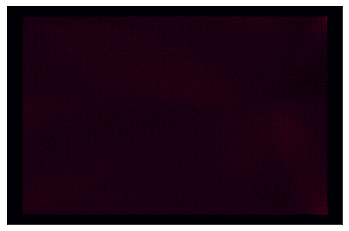

In [258]:
import matplotlib.pyplot as plt
import torch
import matplotlib.cm as cm

# Extract the colormap
cmap = cm.get_cmap('inferno_r')

# Set the background color to the lowest color of inferno_r
background_color = cmap(1.0)

# Set the point color to 0.6 on the inferno_r scale
point_color = cmap(0.6)

# Create the plot
fig, ax = plt.subplots()
ax.set_facecolor(background_color)
ax.scatter(all_samples[:, 0], all_samples[:, 1], c=point_color, s=1, alpha=0.01)

# Remove ticks
ax.set_xticks([])
ax.set_yticks([])

plt.show()

# Simple NNEt

In [49]:
# train ratio copula
from Ratio import Ratio
from Ratio import loss_nce
from tqdm import tqdm
from torch import tensor as tt
u1, u2 = u,v

q_data = np.random.randn(5000,2)
ratio = Ratio(h_dim=100, in_dim=2, h_layers=5)

optimizer = torch.optim.Adam(ratio.parameters(), lr= 0.002)
z[z==np.inf] = 0


for epoch in tqdm(range(2)):
    optimizer.zero_grad()
    r_p = ratio(tt(z[np.random.choice(range(z.shape[0]),size=5000)]).float())
    r_q = ratio(tt(np.random.randn(5000,2)).float())
    #loss = (-(r_p /(1+r_p)).log() - (1/(1+r_q)).log() ).mean()
    loss = loss_nce(r_p, r_q, 5000, 5000)
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        with torch.no_grad():
            print(f'Epoch {epoch}, loss {loss.item()}')

model = ratio

 50%|█████     | 1/2 [00:00<00:00,  2.51it/s]

Epoch 0, loss 1.5497453212738037


100%|██████████| 2/2 [00:00<00:00,  3.30it/s]


In [77]:

model.load_state_dict(
torch.load('NNet_ratio_einstein_simpleNNet_1Ms_100Ke_5L_no_noise_10Kbatches_actual100Ke.pt'))  
total_params = sum(p.numel() for p in model.parameters())
print(f'Total parameters: {total_params}')

Total parameters: 10501


In [235]:

model.load_state_dict(
torch.load('NNet_ratio_cop_simpleNNet_1Ms_100Ke_no_noise_100Kbatches.pt'))  
total_params = sum(p.numel() for p in model.parameters())
print(f'Total parameters: {total_params}')

Total parameters: 10501


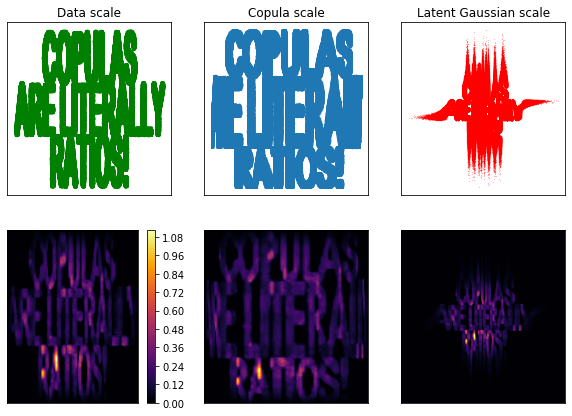

In [239]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as scs

meshgrid = np.meshgrid(np.linspace(-4,4,200), np.linspace(-4,4,200))

ratio_grid = model(tt(np.stack([meshgrid[0].flatten(), meshgrid[1].flatten()], axis=1)).float()).detach().numpy() # 1000x1000
gauss = torch.distributions.MultivariateNormal(tt([0.,0.]), tt([[1.,0.],[0.,1.]])).log_prob(tt(np.stack([meshgrid[0].flatten(), meshgrid[1].flatten()], axis=1)).float()).exp().reshape(-1,1).detach().numpy()
    
#ratio_grid = np.clip(ratio_grid, a_min=-np.inf, a_max=10.)
# Adjust the subplot configuration to 2 rows by 3 columns
fig, ax = plt.subplots(2, 3, figsize=(10, 7))  # Adjusted for 6 plots

# Original scatter plots

ax[0, 0].scatter(data_p[:,0], data_p[:,1], s=3, c='green', alpha=0.2)
ax[0, 1].scatter(u, v, s=3, alpha=0.2)
#ax[0, 2].scatter(scs.norm.rvs(size=10000), scs.norm.rvs(size=10000), s=1, c='black')
ax[0, 2].scatter(z1, z2, s=0.01, c='red')

# Titles for each scatter plot
ax[0, 0].set_title('Data scale')
ax[0, 1].set_title('Copula scale')
ax[0, 2].set_title('Latent Gaussian scale')
# Remove ticks from contour plots
for i in range(3):
    ax[0, i].set_xticks([])
    ax[0, i].set_yticks([])
# Original contour plots with colorbars
in_1 = scs.norm.cdf(meshgrid[0])#np.clip(,a_max=0.99999,a_min=0.00001)
in_2 = scs.norm.cdf(meshgrid[1])#np.clip(,a_max=0.99999,a_min=0.00001)

contour_set = ax[1, 0].contourf(inverted_cdf1(in_1),inverted_cdf2(in_2), (gauss* ratio_grid).reshape(200, 200),levels=100,cmap='inferno')
contour_set = ax[1, 1].contourf(scs.norm.cdf(meshgrid[0]), scs.norm.cdf(meshgrid[1]), (gauss*ratio_grid).reshape(200, 200),levels=100,cmap='inferno')
contour_set = ax[1, 2].contourf(meshgrid[0], meshgrid[1], (gauss*ratio_grid).reshape(200, 200),levels=100,cmap='inferno')
plt.colorbar(contour_set, ax=ax[1, 0])
# Remove ticks from contour plots
for i in range(3):
    ax[1, i].set_xticks([])
    ax[1, i].set_yticks([])




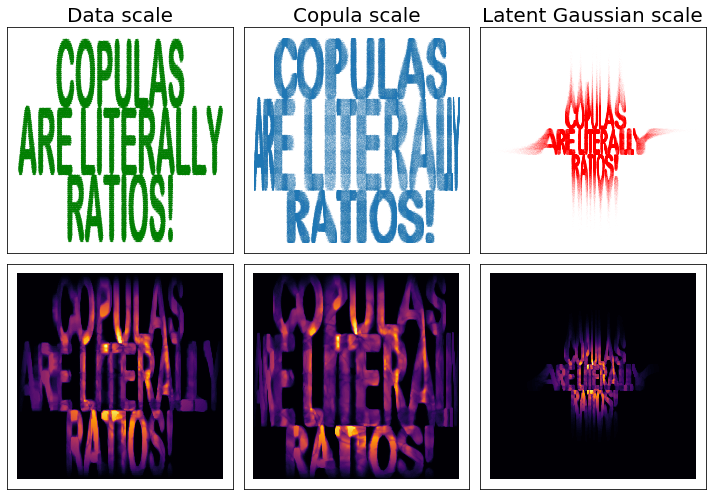

In [240]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as scs
import matplotlib.cm as cm

xy_ = np.max(np.abs(z))
meshgrid = np.meshgrid(np.linspace(-xy_, xy_, 1000), np.linspace(-xy_, xy_, 1000))

ratio_grid = model(tt(np.stack([meshgrid[0].flatten(), meshgrid[1].flatten()], axis=1)).float()).detach().numpy()  # 1000x1000
ratio_grid = (np.clip(ratio_grid, a_min=0.01, a_max=4.))
ratio_grid[ratio_grid==np.nan] = 0
gauss = torch.distributions.MultivariateNormal(tt([0., 0.]), tt([[1., 0.], [0., 1.]])).log_prob(
    tt(np.stack([meshgrid[0].flatten(), meshgrid[1].flatten()], axis=1)).float()).exp().reshape(-1, 1).detach().numpy()

ratio_grid = np.clip(ratio_grid, a_min=-np.inf, a_max=4.)
# Adjust the subplot configuration to 2 rows by 3 columns
fig, ax = plt.subplots(2, 3, figsize=(10, 7))  # Adjusted for 6 plots

# Original scatter plots

ax[0, 0].scatter(data_p[:, 0], data_p[:, 1], s=0.005, c='green', alpha=0.2)
ax[0, 1].scatter(u, v, s=0.005, alpha=0.2)
# ax[0, 2].scatter(scs.norm.rvs(size=10000), scs.norm.rvs(size=10000), s=1, c='black')
ax[0, 2].scatter(z1, z2, s=0.00001, c='red')

# Titles for each scatter plot
ax[0, 0].set_title('Data scale', fontsize=20)
ax[0, 1].set_title('Copula scale', fontsize=20)
ax[0, 2].set_title('Latent Gaussian scale', fontsize=20)
# Remove ticks from scatter plots
for i in range(3):
    ax[0, i].set_xticks([])
    ax[0, i].set_yticks([])

# Original contour plots with colorbars
in_1 = scs.norm.cdf(meshgrid[0])  # np.clip(,a_max=0.99999,a_min=0.00001)
in_2 = scs.norm.cdf(meshgrid[1])  # np.clip(,a_max=0.99999,a_min=0.00001)

contourf_lvl = 100

contour_set = ax[1, 0].contourf(inverted_cdf1(in_1), inverted_cdf2(in_2), (gauss * ratio_grid).reshape(1000, 1000),
                                levels=contourf_lvl, cmap='inferno')
contour_set = ax[1, 1].contourf(scs.norm.cdf(meshgrid[0]), scs.norm.cdf(meshgrid[1]), (gauss * ratio_grid).reshape(1000, 1000),
                                levels=contourf_lvl, cmap='inferno')
contour_set = ax[1, 2].contourf(meshgrid[0], meshgrid[1], (gauss * ratio_grid).reshape(1000, 1000), levels=contourf_lvl, cmap='inferno')
#plt.colorbar(contour_set, ax=ax[1, 0])

# Remove ticks from contour plots and set the same x and y limits as the top row
for i in range(3):
    ax[1, i].set_xticks([])
    ax[1, i].set_yticks([])
    ax[1, i].set_xlim(ax[0, i].get_xlim())
    ax[1, i].set_ylim(ax[0, i].get_ylim())

# Set the background color of the bottom row plots to the lowest color of the inferno_r colormap
#lowest_color = cm.inferno(0)
#for i in range(3):
#    ax[1, i].set_facecolor(lowest_color)

plt.tight_layout()

In [117]:
ratio_einstein = scs.norm.cdf(meshgrid[0]), scs.norm.cdf(meshgrid[1]), (gauss * ratio_grid).reshape(1000, 1000)

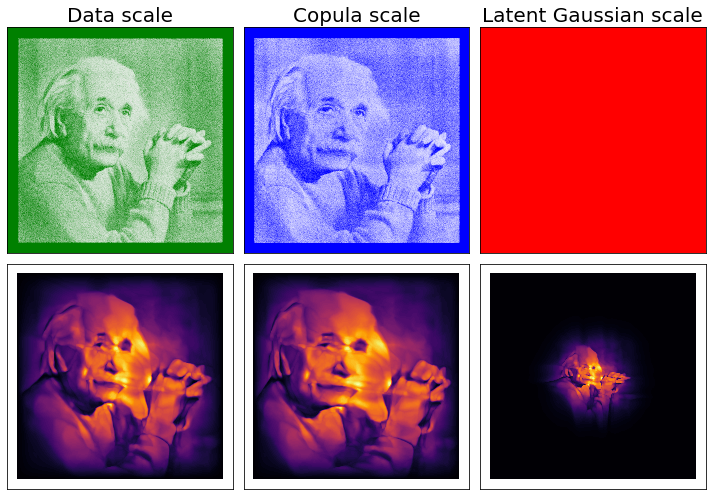

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as scs
import torch
import matplotlib.cm as cm

# Assuming z, model, tt, data_p, u, v, z1, z2, inverted_cdf1, and inverted_cdf2 are defined elsewhere in your code

xy_ = np.max(np.abs(z))
meshgrid = np.meshgrid(np.linspace(-xy_, xy_, 1000), np.linspace(-xy_, xy_, 1000))

ratio_grid = model(tt(np.stack([meshgrid[0].flatten(), meshgrid[1].flatten()], axis=1)).float()).detach().numpy()  # 1000x1000
ratio_grid = (np.clip(ratio_grid, a_min=0.01, a_max=4.))
ratio_grid[ratio_grid==np.nan] = 0
gauss = torch.distributions.MultivariateNormal(tt([0., 0.]), tt([[1., 0.], [0., 1.]])).log_prob(
    tt(np.stack([meshgrid[0].flatten(), meshgrid[1].flatten()], axis=1)).float()).exp().reshape(-1, 1).detach().numpy()

ratio_grid = np.clip(ratio_grid, a_min=-np.inf, a_max=4.)
# Adjust the subplot configuration to 2 rows by 3 columns
fig, ax = plt.subplots(2, 3, figsize=(10, 7))  # Adjusted for 6 plots

# Original scatter plots with background colors
ax[0, 0].set_facecolor('green')
ax[0, 0].scatter(data_p[:, 0], data_p[:, 1], s=0.005, c='white', alpha=0.2)

ax[0, 1].set_facecolor('blue')
ax[0, 1].scatter(u, v, s=0.005, c='white', alpha=0.2)

ax[0, 2].set_facecolor('red')
ax[0, 2].scatter(z1, z2, s=0.000001, c='white')

# Titles for each scatter plot
ax[0, 0].set_title('Data scale', fontsize=20)
ax[0, 1].set_title('Copula scale', fontsize=20)
ax[0, 2].set_title('Latent Gaussian scale', fontsize=20)

# Remove ticks from scatter plots
for i in range(3):
    ax[0, i].set_xticks([])
    ax[0, i].set_yticks([])

# Original contour plots with colorbars
in_1 = scs.norm.cdf(meshgrid[0])  # np.clip(,a_max=0.99999,a_min=0.00001)
in_2 = scs.norm.cdf(meshgrid[1])  # np.clip(,a_max=0.99999,a_min=0.00001)

contourf_lvl = 100

contour_set = ax[1, 0].contourf(inverted_cdf1(in_1), inverted_cdf2(in_2), (gauss * ratio_grid).reshape(1000, 1000),
                                levels=contourf_lvl, cmap='inferno')
contour_set = ax[1, 1].contourf(scs.norm.cdf(meshgrid[0]), scs.norm.cdf(meshgrid[1]), (gauss * ratio_grid).reshape(1000, 1000),
                                levels=contourf_lvl, cmap='inferno')
contour_set = ax[1, 2].contourf(meshgrid[0], meshgrid[1], (gauss * ratio_grid).reshape(1000, 1000), levels=contourf_lvl, cmap='inferno')

# Remove ticks from contour plots and set the same x and y limits as the top row
for i in range(3):
    ax[1, i].set_xticks([])
    ax[1, i].set_yticks([])
    ax[1, i].set_xlim(ax[0, i].get_xlim())
    ax[1, i].set_ylim(ax[0, i].get_ylim())

plt.tight_layout()
plt.show()

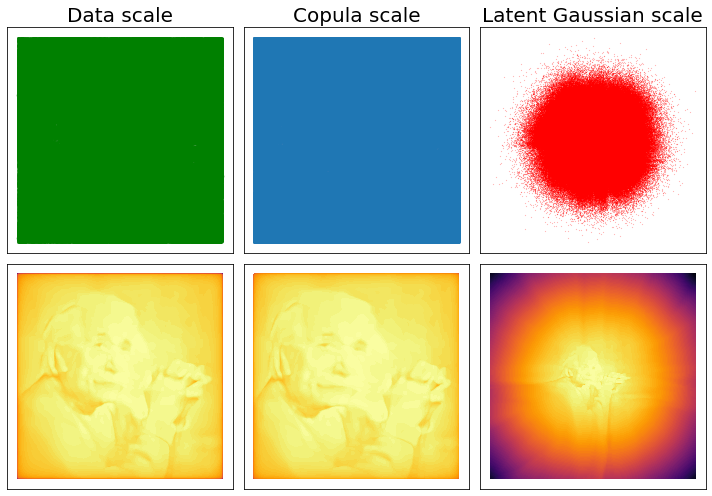

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as scs
import matplotlib.cm as cm

xy_ = np.max(np.abs(z))
meshgrid = np.meshgrid(np.linspace(-xy_, xy_, 1000), np.linspace(-xy_, xy_, 1000))

ratio_grid = model(tt(np.stack([meshgrid[0].flatten(), meshgrid[1].flatten()], axis=1)).float()).detach().numpy()  # 1000x1000
gauss = torch.distributions.MultivariateNormal(tt([0., 0.]), tt([[1., 0.], [0., 1.]])).log_prob(
    tt(np.stack([meshgrid[0].flatten(), meshgrid[1].flatten()], axis=1)).float()).exp().reshape(-1, 1).detach().numpy()

#ratio_grid = np.clip(ratio_grid, a_min=0.1, a_max=4.)
# Adjust the subplot configuration to 2 rows by 3 columns
fig, ax = plt.subplots(2, 3, figsize=(10, 7))  # Adjusted for 6 plots

# Original scatter plots

ax[0, 0].scatter(data_p[:, 0], data_p[:, 1], s=3, c='green', alpha=0.2)
ax[0, 1].scatter(u, v, s=3, alpha=0.2)
# ax[0, 2].scatter(scs.norm.rvs(size=10000), scs.norm.rvs(size=10000), s=1, c='black')
ax[0, 2].scatter(z1, z2, s=0.01, c='red')

# Titles for each scatter plot
ax[0, 0].set_title('Data scale', fontsize=20)
ax[0, 1].set_title('Copula scale', fontsize=20)
ax[0, 2].set_title('Latent Gaussian scale', fontsize=20)
# Remove ticks from scatter plots
for i in range(3):
    ax[0, i].set_xticks([])
    ax[0, i].set_yticks([])

# Original contour plots with colorbars
in_1 = scs.norm.cdf(meshgrid[0])  # np.clip(,a_max=0.99999,a_min=0.00001)
in_2 = scs.norm.cdf(meshgrid[1])  # np.clip(,a_max=0.99999,a_min=0.00001)

contourf_lvl = 100

contour_set = ax[1, 0].contourf(inverted_cdf1(in_1), inverted_cdf2(in_2), np.log(gauss * ratio_grid).reshape(1000, 1000),
                                levels=contourf_lvl, cmap='inferno')
contour_set = ax[1, 1].contourf(scs.norm.cdf(meshgrid[0]), scs.norm.cdf(meshgrid[1]), np.log(gauss * ratio_grid).reshape(1000, 1000),
                                levels=contourf_lvl, cmap='inferno')
contour_set = ax[1, 2].contourf(meshgrid[0], meshgrid[1], np.log(gauss * ratio_grid).reshape(1000, 1000), levels=contourf_lvl, cmap='inferno')
#plt.colorbar(contour_set, ax=ax[1, 0])

# Remove ticks from contour plots and set the same x and y limits as the top row
for i in range(3):
    ax[1, i].set_xticks([])
    ax[1, i].set_yticks([])
    ax[1, i].set_xlim(ax[0, i].get_xlim())
    ax[1, i].set_ylim(ax[0, i].get_ylim())

# Set the background color of the bottom row plots to the lowest color of the inferno_r colormap
#lowest_color = cm.inferno_r(0)
#for i in range(3):
#    ax[1, i].set_facecolor(lowest_color)

plt.tight_layout()

# TRE

In [3]:
# Fit W_ratio on all examples

def loss_nce(r_p, r_q,p_size, q_size):
    v = q_size / p_size
    return (-(r_p /(v+r_p)).log()).mean() - v* ((v/(v+r_q)).log().mean()) 


# u1_u2 = [u1, u2]
p_data = z
p_data = np.nan_to_num(p_data, nan=0, posinf=0, neginf=0)
# Fit Ratio copula
ratio = W_Ratio_fit(z_cop=p_data[:2],waymarks=5,return_waymark_datasets=False)

# Save the model parameters
#model_path = f'model_parameters_W_ratio_25_runs_4copulas_2Dexperiment/NNet_ratio_run_{r}_cop_u_{u}.pt'
#torch.save([r.state_dict() for r in ratio], model_path)


Epoch 500, normalising constant 1.0344432592391968 0.5985375642776489
Epoch 500, normalising constant 1.014652132987976 2.952349901199341
Epoch 500, normalising constant 1.00859797000885 2.8484153747558594
Epoch 500, normalising constant 1.0112853050231934 2.742130756378174


In [4]:
# Load the state dictionaries into the model instances
state_dicts = torch.load('W_ratio_cop_im_1Ms_5W_5Ke_1to1indep_clean.pt')

for i,(r, state_dict) in enumerate(zip(ratio, state_dicts)):
    #print(i)
    r.load_state_dict(state_dict)

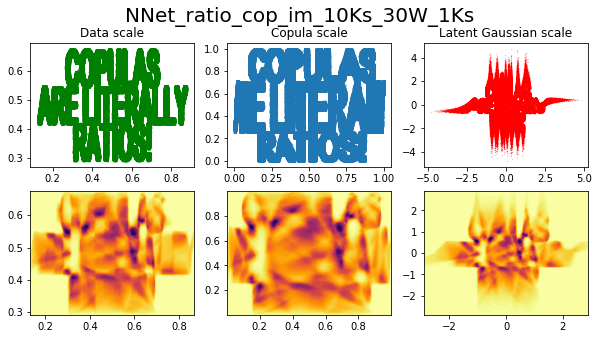

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as scs
from torch import tensor as tt

meshgrid = np.meshgrid(np.linspace(-2.9,2.9,200), np.linspace(-2.9,2.9,200))

ratio_grid = W_ratio_compute(ratio,(tt(np.stack([meshgrid[0].flatten(), meshgrid[1].flatten()], axis=1)).float()).detach().numpy() )# 1000x1000
ratio_grid = ratio_grid.detach().numpy()
gauss = torch.distributions.MultivariateNormal(tt([0.,0.]), tt([[1.,0.],[0.,1.]])).log_prob(tt(np.stack([meshgrid[0].flatten(), meshgrid[1].flatten()], axis=1)).float()).exp().reshape(-1,1).detach().numpy()
    
#ratio_grid = np.clip(ratio_grid, a_min=0.01, a_max=1.5)
# Adjust the subplot configuration to 2 rows by 3 columns
fig, ax = plt.subplots(2, 3, figsize=(10, 5))  # Adjusted for 6 plots
fig.suptitle('NNet_ratio_cop_im_10Ks_30W_1Ks', fontsize=20)
# Original scatter plots

ax[0, 0].scatter(data_p[:,0], data_p[:,1], s=3, c='green', alpha=0.2)
ax[0, 1].scatter(u, v, s=3, alpha=0.2)
#ax[0, 2].scatter(scs.norm.rvs(size=10000), scs.norm.rvs(size=10000), s=1, c='black')
ax[0, 2].scatter(z1, z2, s=0.01, c='red')

# Titles for each scatter plot
ax[0, 0].set_title('Data scale')
ax[0, 1].set_title('Copula scale')
ax[0, 2].set_title('Latent Gaussian scale')

# Original contour plots with colorbars
in_1 = scs.norm.cdf(meshgrid[0])# np.clip(,a_max=0.999,a_min=0.0004)
in_2 =scs.norm.cdf(meshgrid[1])#  np.clip(,a_max=0.999,a_min=0.0004)

contour_set = ax[1, 0].contourf(inverted_cdf1(in_1),inverted_cdf2(in_2), (gauss* ratio_grid).reshape(200, 200),levels=100,cmap='inferno_r')
contour_set = ax[1, 1].contourf(scs.norm.cdf(meshgrid[0]), scs.norm.cdf(meshgrid[1]), (gauss*ratio_grid).reshape(200, 200),levels=100,cmap='inferno_r')
contour_set = ax[1, 2].contourf(meshgrid[0], meshgrid[1], (gauss*ratio_grid).reshape(200, 200),levels=100,cmap='inferno_r')


In [136]:
z[z==np.inf] = 0
kde = scs.gaussian_kde(z.T, bw_method=0.02)
x, y = np.linspace(-3.9, 3.9, 100), np.linspace(-2.9, 2.9, 100)
X, Y = np.meshgrid(x, y)
Z = kde(np.vstack([X.ravel(), Y.ravel()])).reshape(X.shape)


KeyboardInterrupt: 

NameError: name 'Z' is not defined

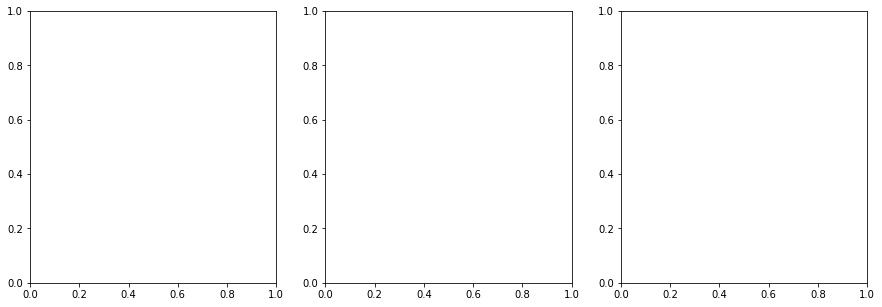

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as scs

# Assuming X, Y, Z are already defined
# X, Y = np.meshgrid(np.linspace(-2.9, 2.9, 100), np.linspace(-2.9, 2.9, 100))
# Z = some_function_to_compute_Z(X, Y)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))  # Create a figure with 3 subplots in a row

# First subplot - data scale
in_1 = np.clip(scs.norm.cdf(X), a_max=0.999, a_min=0.001)
in_2 = np.clip(scs.norm.cdf(Y), a_max=0.999, a_min=0.001)
ax[0].contourf(inverted_cdf1(in_1), inverted_cdf2(in_2), Z, levels=100, cmap='inferno')
ax[0].set_title('Data scale')

# Second subplot - Copula scale
ax[1].contourf(scs.norm.cdf(X), scs.norm.cdf(Y), Z, levels=100, cmap='inferno')
ax[1].set_title('Copula scale')

# Third subplot - Latent Gaussian scale
ax[2].contourf(X, Y, Z, levels=100, cmap='inferno')
ax[2].set_title('Latent Gaussian scale')

plt.show()